Imports de bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imports des datasets

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

Dimensions :
- X_train : (60000, 28, 28)
- y_train : (60000,)
- X_test : (10000, 28, 28)
- y_test : (10000,)


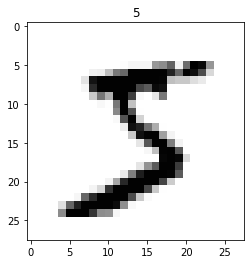

In [ ]:
plt.title(y_train[0])
plt.imshow(X_train[0],cmap='Greys')

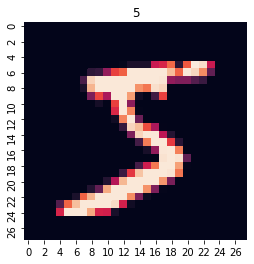

In [ ]:
plt.figure(figsize=(4,4))
plt.title(y_train[0])
sns.heatmap(X_train[0], cbar=False)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

Dimensions :
- X_train : (60000, 784)
- y_train : (60000, 1)
- X_test : (10000, 784)
- y_test : (10000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler

encoder = StandardScaler()
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
model_1 = RandomForestClassifier(random_state = 0)
cross_val_score(model_1, X_train, y_train, cv=4).mean()
# Score : 0.9657

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(random_state=0, contamination=0.05)
model.fit(X_train)
pred = model.predict(X_train)
outliers = pred == -1 
a_garder = pred == 1 
# pred.value_counts()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


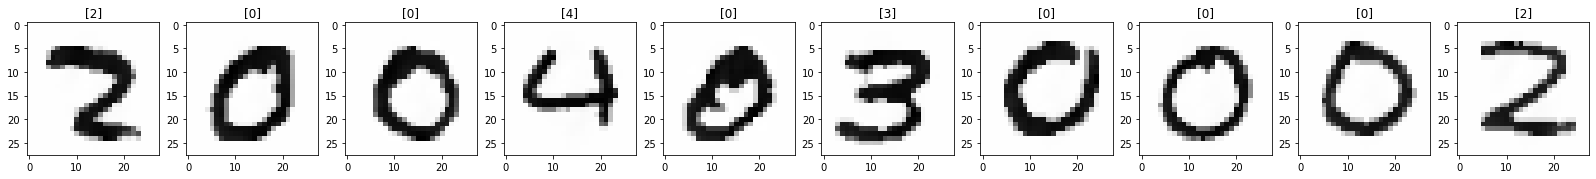

In [ ]:
X_essai = encoder.inverse_transform(X_train).reshape(X_train.shape[0],28,28)

plt.figure(figsize=(28, 15))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_essai[outliers][i],cmap='Greys')
  plt.title(y_train[outliers][i])

In [ ]:
X_train = X_train[a_garder]
y_train = y_train[a_garder]

model_1 = RandomForestClassifier(random_state = 0)

model_1.fit(X_train,y_train)
cross_val_score(model_1, X_train, y_train, cv=4).mean()
# Score : 0.9661

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

0.9661578947368421

In [ ]:
from sklearn.model_selection import GridSearchCV

model_1 = RandomForestClassifier(random_state = 0, criterion='gini', max_features='sqrt')

param_grid = {'n_estimators': [1100,1200],
              'max_depth' : [25,26,27]}

grid = GridSearchCV(model_1, param_grid, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 25, 'n_estimators': 1100}
0.9665087719298245


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

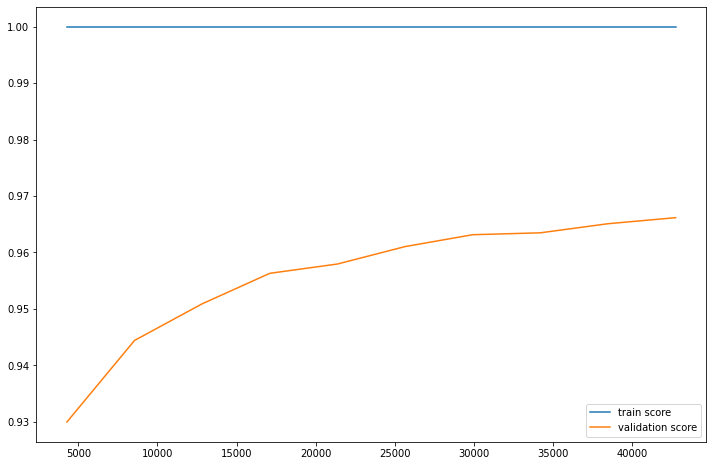

In [ ]:
from sklearn.model_selection import learning_curve

def courbe_apprentissage(model):    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

courbe_apprentissage(model_1)

In [ ]:
from sklearn.decomposition import PCA

n_dims = X_train.shape[1]
model = PCA(n_components=0.99)
X_train_PCA = model.fit_transform(X_train)

X_train_PCA.shape

(57000, 543)

In [ ]:
model = RandomForestClassifier(random_state = 0, criterion='gini', max_features='sqrt', max_depth=25, n_estimators=1100)
cross_val_score(model, X_train, y_train, cv=4).mean()
# La PCA a passer le score de 0.9665 à 0.9673

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.9673508771929824

In [ ]:
# from sklearn.feature_selection import SelectFromModel
# selector = SelectFromModel(model, threshold='mean')
# selector.fit(X_train, y_train)
# X_train = X_train[selector.get_support()]

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


AttributeError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

model_1 = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=0))
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = make_pipeline(StandardScaler(), SVC(random_state=0))
model_4 = make_pipeline(StandardScaler(), KNeighborsClassifier())
model_5 = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
model_6 = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=0))
model_7 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),n_estimators=100)
model_8 = make_pipeline(StandardScaler(), xgb.XGBClassifier(random_state=0))

dict_models = {'AdaBoostClassifier':model_1,
               'DecisionTreeClassifier':model_2,
               'SVC':model_3,
               'KNeighborsClassifier':model_4,
               'LogisticRegression':model_5,
               'GradientBoostingClassifier':model_6,
               'BaggingClassifier':model_7,
               'XGBClassifier':model_8}

liste = []
for name, model in dict_models.items():
  precision = cross_val_score(model, X_train, y_train, cv=3).mean()
  print(f'{name} -> {precision}\n')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
model_1 = RandomForestClassifier(random_state = 0)
cross_val_score(model_1, X_train, y_train, cv=4).mean()

In [ ]:
score_test = model.score(X_test,y_test)
score_train = model.score(X_train,y_train)
print(f'Score train : {score_train}')
print(f'Score test : {score_test}')

Score train : 1.0
Score test : 0.9604


## Deep Learning

In [ ]:
from sklearn.model_selection import train_test_split      

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_validation = train_test_split(X_train_full, test_size=0.2, random_state=0)
y_train, y_validation = train_test_split(y_train_full, test_size=0.2, random_state=0)

print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_validation : {X_validation.shape}\n- y_validation : {y_validation.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

Dimensions :
- X_train : (48000, 28, 28)
- y_train : (48000,)
- X_validation : (12000, 28, 28)
- y_validation : (12000,)
- X_test : (10000, 28, 28)
- y_test : (10000,)


Normaliser sinon l'accuracy stagne à 11%

In [ ]:
X_train = X_train / 255.0
X_validation = X_validation / 255.0
X_test = X_test / 255.0

In [ ]:
from sklearn.decomposition import PCA

n_dims = X_train.shape[1]
model = PCA(n_components=0.99)
X_train = model.fit_transform(X_train.reshape(-1,28*28))
X_validation = model.transform(X_validation.reshape(-1,28*28))
X_test = model.transform(X_test.reshape(-1,28*28))

print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_validation : {X_validation.shape}\n- y_validation : {y_validation.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

Dimensions :
- X_train : (48000, 331)
- y_train : (48000,)
- X_validation : (12000, 331)
- y_validation : (12000,)
- X_test : (10000, 331)
- y_test : (10000,)


In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=X_train.shape[1:]),#input_shape=(28,28)),
                          keras.layers.BatchNormalization(),
                          # keras.layers.Dropout(rate=0.2),
                          keras.layers.Dense(200, activation='selu'), #kernel_initializer='he_normal', #kernel_regularizer=keras.regularizers.l2(0.01)),
                          keras.layers.BatchNormalization(),
                          # keras.layers.Dropout(rate=0.2),
                          keras.layers.Dense(100, activation='selu'), #kernel_initializer='he_normal', #kernel_regularizer=keras.regularizers.l2(0.01)),
                          keras.layers.BatchNormalization(),
                          # keras.layers.Dropout(rate=0.2),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.2,
                                             momentum=0.9),
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                               patience=3, 
                                               restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_validation,y_validation),
                    callbacks=[early_stopping])
# 0.9765 --> 0.9787 (PCA)

Epoch 1/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3788 - accuracy: 0.8877 - val_loss: 0.1635 - val_accuracy: 0.9490
Epoch 2/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2079 - accuracy: 0.9376 - val_loss: 0.1394 - val_accuracy: 0.9613
Epoch 3/100
 153/1500 [==>...........................] - ETA: 2s - loss: 0.1773 - accuracy: 0.9446

KeyboardInterrupt: ignored

(0.0, 1.0)

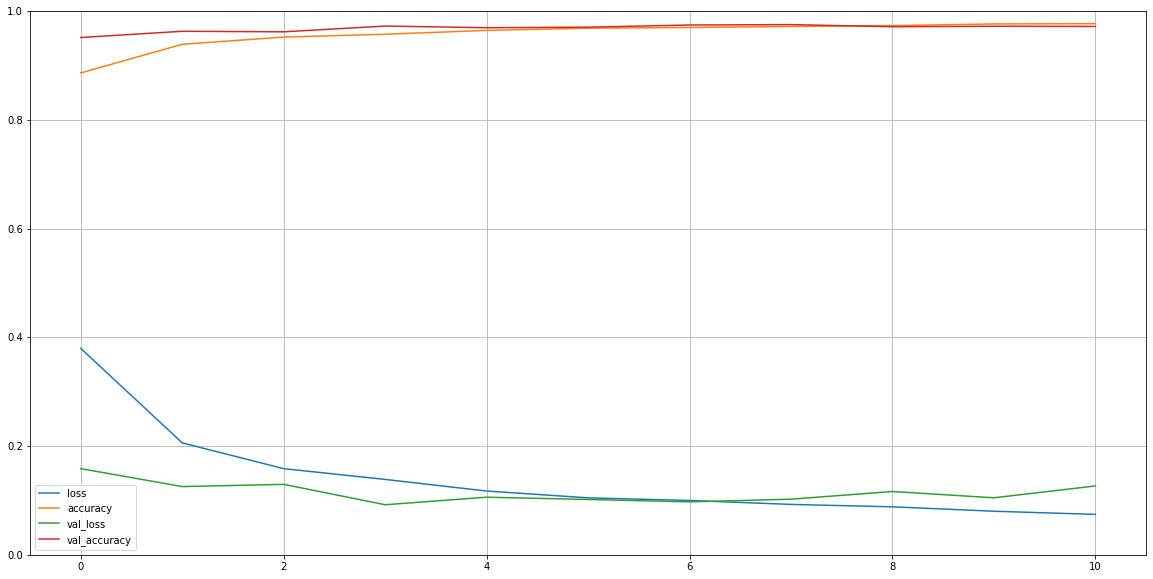

In [ ]:
pd.DataFrame(history.history).plot(figsize=(20,10))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [ ]:
model.evaluate(X_test,y_test) # De 0.9604 à 0.9752 (avec DL)

313/313 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9752


[0.10316711664199829, 0.9751999974250793]

CNN

In [ ]:
from sklearn.model_selection import train_test_split      

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_validation = train_test_split(X_train_full, test_size=0.2, random_state=0)
y_train, y_validation = train_test_split(y_train_full, test_size=0.2, random_state=0)

print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_validation : {X_validation.shape}\n- y_validation : {y_validation.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
Dimensions :
- X_train : (48000, 28, 28)
- y_train : (48000,)
- X_validation : (12000, 28, 28)
- y_validation : (12000,)
- X_test : (10000, 28, 28)
- y_test : (10000,)


In [ ]:
X_train = X_train / 255.0
X_validation = X_validation / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = X_train.reshape(list(X_train.shape) + [1])
X_validation = X_validation.reshape(list(X_validation.shape) + [1])
X_test = X_test.reshape(list(X_test.shape) + [1])

print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_validation : {X_validation.shape}\n- y_validation : {y_validation.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

Dimensions :
- X_train : (48000, 28, 28, 1)
- y_train : (48000,)
- X_validation : (12000, 28, 28, 1)
- y_validation : (12000,)
- X_test : (10000, 28, 28, 1)
- y_test : (10000,)


In [ ]:
model = keras.Sequential([keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D(2),

                          keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                          keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                          keras.layers.MaxPooling2D(2),

                          keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                          keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                          keras.layers.MaxPooling2D(2),

                          keras.layers.Flatten(),

                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dropout(0.5),

                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dropout(0.5),
                          
                          keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc',
                                               patience=3, 
                                               restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_validation,y_validation),
                    callbacks=[early_stopping]) # 0.9912

Epoch 1/50
1500/1500 [==============================] - 687s 458ms/step - loss: 0.4463 - acc: 0.8612 - val_loss: 0.0759 - val_acc: 0.9821
Epoch 2/50
1500/1500 [==============================] - 676s 451ms/step - loss: 0.1357 - acc: 0.9680 - val_loss: 0.0622 - val_acc: 0.9838
Epoch 3/50
1500/1500 [==============================] - 670s 447ms/step - loss: 0.0923 - acc: 0.9785 - val_loss: 0.0515 - val_acc: 0.9878
Epoch 4/50
1500/1500 [==============================] - 665s 443ms/step - loss: 0.0769 - acc: 0.9824 - val_loss: 0.0557 - val_acc: 0.9902
Epoch 5/50
1500/1500 [==============================] - 670s 447ms/step - loss: 0.0709 - acc: 0.9844 - val_loss: 0.0702 - val_acc: 0.9848
Epoch 6/50
1500/1500 [==============================] - 682s 454ms/step - loss: 0.0535 - acc: 0.9878 - val_loss: 0.0593 - val_acc: 0.9899
Epoch 7/50
1500/1500 [==============================] - 682s 455ms/step - loss: 0.0487 - acc: 0.9888 - val_loss: 0.0575 - val_acc: 0.9893


In [ ]:
model.evaluate(X_test,y_test) # De 0.9752 à 0.9916 (avec un CNN)

Proprocessing avec isolationForest

In [ ]:
from sklearn.model_selection import train_test_split      

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_validation = train_test_split(X_train_full, test_size=0.2, random_state=0)
y_train, y_validation = train_test_split(y_train_full, test_size=0.2, random_state=0)

print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_validation : {X_validation.shape}\n- y_validation : {y_validation.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

In [ ]:
X_train = X_train / 255.0
X_validation = X_validation / 255.0
X_test = X_test / 255.0

In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(random_state=0, contamination=0.05)
model.fit(X_train.reshape(-1,28*28))
pred = model.predict(X_train.reshape(-1,28*28))
outliers = pred == -1 
a_garder = pred == 1 

X_train = X_train[a_garder]
y_train = y_train[a_garder]

print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_validation : {X_validation.shape}\n- y_validation : {y_validation.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

In [ ]:
X_train = X_train.reshape(list(X_train.shape) + [1])
X_validation = X_validation.reshape(list(X_validation.shape) + [1])
X_test = X_test.reshape(list(X_test.shape) + [1])

print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_validation : {X_validation.shape}\n- y_validation : {y_validation.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

In [ ]:
model = keras.Sequential([
                          keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D(2),

                          keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                          keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                          keras.layers.MaxPooling2D(2),

                          keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                          keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                          keras.layers.MaxPooling2D(2),

                          keras.layers.Flatten(),

                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dropout(0.5),

                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dropout(0.5),
                          
                          keras.layers.Dense(10, activation='softmax')
])

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                               patience=3, 
                                               restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_validation,y_validation),
                    callbacks=[early_stopping]) # 0.9912

In [ ]:
model.evaluate(X_test,y_test) # De 0.9752 à 0.9916 (avec un CNN)

In [ ]:
from sklearn.model_selection import train_test_split      

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_validation = train_test_split(X_train_full, test_size=0.2, random_state=0)
y_train, y_validation = train_test_split(y_train_full, test_size=0.2, random_state=0)

print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_validation : {X_validation.shape}\n- y_validation : {y_validation.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

Dimensions :
- X_train : (48000, 28, 28)
- y_train : (48000,)
- X_validation : (12000, 28, 28)
- y_validation : (12000,)
- X_test : (10000, 28, 28)
- y_test : (10000,)


In [ ]:
X_train = X_train.reshape(list(X_train.shape) + [1])
X_validation = X_validation.reshape(list(X_validation.shape) + [1])
X_test = X_test.reshape(list(X_test.shape) + [1])

print(f'Dimensions :\n- X_train : {X_train.shape}\n- y_train : {y_train.shape}\n- X_validation : {X_validation.shape}\n- y_validation : {y_validation.shape}\n- X_test : {X_test.shape}\n- y_test : {y_test.shape}')

Dimensions :
- X_train : (48000, 28, 28, 1)
- y_train : (48000,)
- X_validation : (12000, 28, 28, 1)
- y_validation : (12000,)
- X_test : (10000, 28, 28, 1)
- y_test : (10000,)
